# Breast Cancer Prediction System - Model Development
## Part A: Model Development

This notebook demonstrates the development of a breast cancer prediction system using the Wisconsin Breast Cancer dataset.

**Selected Features:**
1. radius_mean
2. texture_mean
3. perimeter_mean
4. area_mean
5. smoothness_mean

**Algorithm:** Neural Networks (Deep Learning)

**Note:** This system is strictly for educational purposes and must not be presented as a medical diagnostic tool.

## 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import joblib
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the Breast Cancer Wisconsin Dataset

In [2]:
# Load dataset
data = load_breast_cancer()

# Display dataset information
print("Dataset shape:", data.data.shape)
print("\nFeature names:")
for i, name in enumerate(data.feature_names):
    print(f"{i}: {name}")
    
print("\nTarget names:", data.target_names)
print("Target distribution:")
print(f"Malignant (0): {sum(data.target == 0)}")
print(f"Benign (1): {sum(data.target == 1)}")

Dataset shape: (569, 30)

Feature names:
0: mean radius
1: mean texture
2: mean perimeter
3: mean area
4: mean smoothness
5: mean compactness
6: mean concavity
7: mean concave points
8: mean symmetry
9: mean fractal dimension
10: radius error
11: texture error
12: perimeter error
13: area error
14: smoothness error
15: compactness error
16: concavity error
17: concave points error
18: symmetry error
19: fractal dimension error
20: worst radius
21: worst texture
22: worst perimeter
23: worst area
24: worst smoothness
25: worst compactness
26: worst concavity
27: worst concave points
28: worst symmetry
29: worst fractal dimension

Target names: ['malignant' 'benign']
Target distribution:
Malignant (0): 212
Benign (1): 357


## 3. Data Preprocessing

### 3.1 Feature Selection
Select the first 5 features as per project requirements:
- radius_mean (index 0)
- texture_mean (index 1)
- perimeter_mean (index 2)
- area_mean (index 3)
- smoothness_mean (index 4)

In [3]:
# Select first 5 features
selected_features = [0, 1, 2, 3, 4]
feature_names = [data.feature_names[i] for i in selected_features]

X = data.data[:, selected_features]
y = data.target

print("Selected features:")
for i, name in enumerate(feature_names):
    print(f"{i+1}. {name}")

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Selected features:
1. mean radius
2. mean texture
3. mean perimeter
4. mean area
5. mean smoothness

Feature matrix shape: (569, 5)
Target vector shape: (569,)


### 3.2 Check for Missing Values

In [4]:
# Check for missing values
df = pd.DataFrame(X, columns=feature_names)
print("Missing values per feature:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing values per feature:
mean radius        0
mean texture       0
mean perimeter     0
mean area          0
mean smoothness    0
dtype: int64

Total missing values: 0


### 3.3 Feature Scaling
Apply StandardScaler to normalize the features (mandatory for neural networks)

In [5]:
# Initialize and fit the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature scaling completed.")
print(f"\nOriginal data sample (first 3 rows):")
print(X[:3])
print(f"\nScaled data sample (first 3 rows):")
print(X_scaled[:3])

Feature scaling completed.

Original data sample (first 3 rows):
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01]]

Scaled data sample (first 3 rows):
[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633]
 [ 1.82982061 -0.35363241  1.68595471  1.90870825 -0.82696245]
 [ 1.57988811  0.45618695  1.56650313  1.55888363  0.94221044]]


### 3.4 Split Dataset into Training and Testing Sets

In [6]:
# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set distribution:")
print(f"Malignant (0): {sum(y_train == 0)}")
print(f"Benign (1): {sum(y_train == 1)}")
print(f"\nTesting set distribution:")
print(f"Malignant (0): {sum(y_test == 0)}")
print(f"Benign (1): {sum(y_test == 1)}")

Training set size: 455 samples
Testing set size: 114 samples

Training set distribution:
Malignant (0): 170
Benign (1): 285

Testing set distribution:
Malignant (0): 42
Benign (1): 72


## 4. Build Neural Network Model

In [7]:
# Build Sequential Neural Network
model = Sequential([
    Dense(16, activation='relu', input_shape=(5,), name='hidden_layer_1'),
    Dense(12, activation='relu', name='hidden_layer_2'),
    Dense(1, activation='sigmoid', name='output_layer')
])

# Display model architecture
model.summary()

c:\Users\DELL\Downloads\breast cancer\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 313 (1.22 KB)

 Trainable params: 313 (1.22 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Compile the Model

In [8]:
# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully.")

Model compiled successfully.


## 6. Train the Model

In [9]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

print("\nTraining completed!")

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8324 - loss: 0.5882 - val_accuracy: 0.9121 - val_loss: 0.5044
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9011 - loss: 0.4499 - val_accuracy: 0.9451 - val_loss: 0.3679
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9148 - loss: 0.3385 - val_accuracy: 0.9451 - val_loss: 0.2718
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9258 - loss: 0.2648 - val_accuracy: 0.9341 - val_loss: 0.2109
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9286 - loss: 0.2200 - val_accuracy: 0.9560 - val_loss: 0.1756
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9313 - loss: 0.1938 - val_accuracy: 0.9560 - val_loss: 0.1545
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9396 - loss: 0.1754 - val_accuracy: 0.9560 - val_loss: 0.1387
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9423 - loss: 0.1633 - val_accuracy: 0.9560 - val_loss:

### 6.1 Visualize Training History

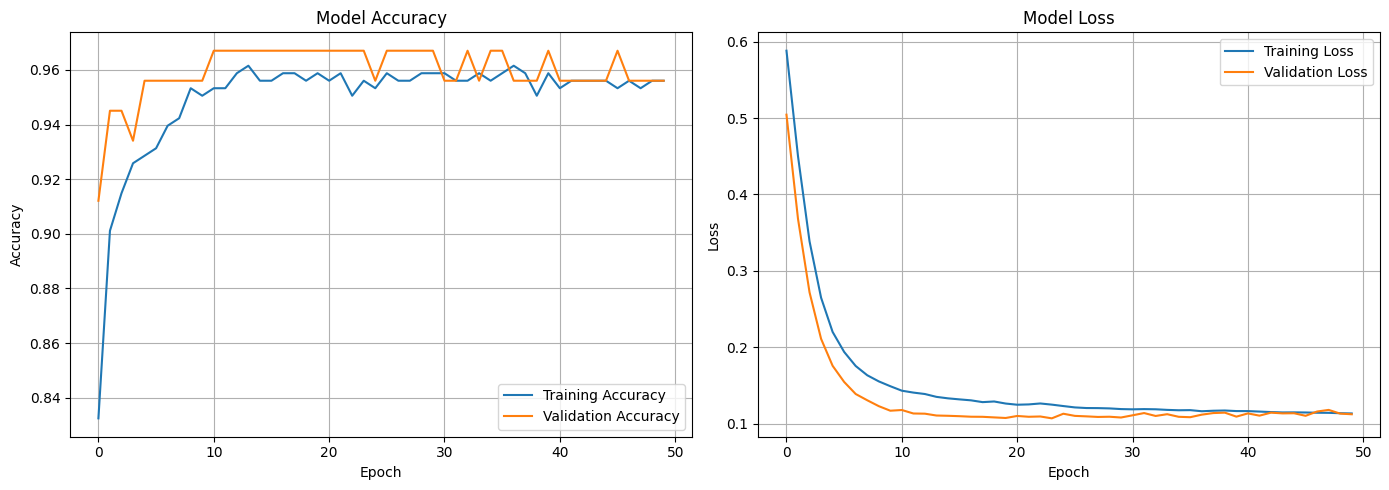

In [10]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 7. Model Evaluation

### 7.1 Make Predictions

In [11]:
# Make predictions on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print(f"Predictions shape: {y_pred.shape}")
print(f"Sample predictions (first 10): {y_pred[:10]}")
print(f"Sample actual values (first 10): {y_test[:10]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predictions shape: (114,)
Sample predictions (first 10): [0 1 0 0 0 1 1 0 0 0]
Sample actual values (first 10): [0 1 0 1 0 1 1 0 0 0]


### 7.2 Calculate Classification Metrics

In [12]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("="*50)
print("MODEL EVALUATION METRICS")
print("="*50)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
print("="*50)

MODEL EVALUATION METRICS
Accuracy:  0.8684 (86.84%)
Precision: 0.9524 (95.24%)
Recall:    0.8333 (83.33%)
F1-Score:  0.8889 (88.89%)


### 7.3 Classification Report

In [13]:
# Print detailed classification report
print("\nDetailed Classification Report:")
print("="*50)
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))


Detailed Classification Report:
              precision    recall  f1-score   support

   Malignant       0.76      0.93      0.84        42
      Benign       0.95      0.83      0.89        72

    accuracy                           0.87       114
   macro avg       0.86      0.88      0.86       114
weighted avg       0.88      0.87      0.87       114



### 7.4 Confusion Matrix

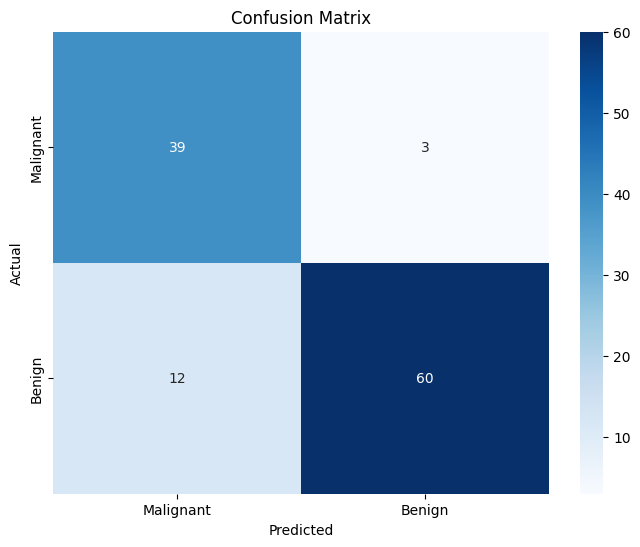


True Negatives:  39
False Positives: 3
False Negatives: 12
True Positives:  60


In [14]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(f"\nTrue Negatives:  {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives:  {cm[1,1]}")

## 8. Save the Trained Model and Scaler

In [15]:
# Save the Keras model using Joblib
# Note: We'll save both the model and scaler in a dictionary for easy loading
model_data = {
    'model': model,
    'scaler': scaler,
    'feature_names': feature_names,
    'metrics': {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
}

# Save using Joblib (saves in the model/ directory where this notebook is located)
joblib.dump(model_data, 'breast_cancer_model.pkl')
print("Model saved successfully as 'model/breast_cancer_model.pkl'")

print("\nModel file location: model/breast_cancer_model.pkl")
print("This file contains both the trained model and the scaler.")

Model saved successfully as 'model/breast_cancer_model.pkl'

Model file location: model/breast_cancer_model.pkl
This file contains both the trained model and the scaler.


## 9. Demonstrate Model Reloading and Prediction

This section demonstrates that the saved model can be reloaded and used for prediction without retraining.

In [16]:
# Reload the saved model
loaded_model_data = joblib.load('breast_cancer_model.pkl')
loaded_model = loaded_model_data['model']
loaded_scaler = loaded_model_data['scaler']

print("Model reloaded successfully!")
print(f"\nSaved metrics:")
for metric, value in loaded_model_data['metrics'].items():
    print(f"  {metric}: {value:.4f}")

Model reloaded successfully!

Saved metrics:
  accuracy: 0.8684
  precision: 0.9524
  recall: 0.8333
  f1_score: 0.8889


### 9.1 Test with Sample Data

In [17]:
# Test with a few samples from the test set
test_samples = X_test[:5]
test_labels = y_test[:5]

# Make predictions using the reloaded model
predictions = loaded_model.predict(test_samples)
predictions_binary = (predictions > 0.5).astype(int).flatten()

print("\nTest Predictions using Reloaded Model:")
print("="*60)
for i in range(len(test_samples)):
    actual = "Benign" if test_labels[i] == 1 else "Malignant"
    predicted = "Benign" if predictions_binary[i] == 1 else "Malignant"
    confidence = predictions[i][0] if predictions_binary[i] == 1 else 1 - predictions[i][0]
    
    print(f"Sample {i+1}:")
    print(f"  Actual: {actual}")
    print(f"  Predicted: {predicted} (Confidence: {confidence*100:.2f}%)")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

Test Predictions using Reloaded Model:
Sample 1:
  Actual: Malignant
  Predicted: Malignant (Confidence: 100.00%)

Sample 2:
  Actual: Benign
  Predicted: Benign (Confidence: 99.92%)

Sample 3:
  Actual: Malignant
  Predicted: Malignant (Confidence: 99.93%)

Sample 4:
  Actual: Benign
  Predicted: Malignant (Confidence: 99.19%)

Sample 5:
  Actual: Malignant
  Predicted: Malignant (Confidence: 100.00%)



### 9.2 Test with Custom Input

In [18]:
# Example: Test with custom input values
# These are sample values - in real application, these would come from user input
custom_input = np.array([
    [17.99, 10.38, 122.8, 1001.0, 0.1184]  # Example values for the 5 features
])

# Scale the input
custom_input_scaled = loaded_scaler.transform(custom_input)

# Make prediction
custom_prediction = loaded_model.predict(custom_input_scaled)
custom_prediction_binary = (custom_prediction > 0.5).astype(int)[0][0]

print("Custom Input Prediction:")
print("="*60)
print(f"Input features:")
for i, (name, value) in enumerate(zip(feature_names, custom_input[0])):
    print(f"  {name}: {value}")

if custom_prediction_binary == 1:
    print(f"\nPrediction: Benign (Non-cancerous)")
    print(f"Confidence: {custom_prediction[0][0]*100:.2f}%")
else:
    print(f"\nPrediction: Malignant (Cancerous)")
    print(f"Confidence: {(1-custom_prediction[0][0])*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Custom Input Prediction:
Input features:
  mean radius: 17.99
  mean texture: 10.38
  mean perimeter: 122.8
  mean area: 1001.0
  mean smoothness: 0.1184

Prediction: Malignant (Cancerous)
Confidence: 99.78%


## Summary

This notebook has demonstrated:
1. ✅ Loading the Breast Cancer Wisconsin dataset
2. ✅ Data preprocessing (missing value check, feature selection, scaling)
3. ✅ Implementation of Neural Networks algorithm
4. ✅ Model training
5. ✅ Evaluation using Accuracy, Precision, Recall, and F1-Score
6. ✅ Model persistence using Joblib
7. ✅ Demonstration of model reloading and prediction without retraining

**Important Note:** This system is strictly for educational purposes and must not be presented as a medical diagnostic tool.